In [1]:
import cv2
image = cv2.imread(
    '/Users/lutingwang/Developer/datasets/coco/val2017/'
    '000000000139.jpg'
)
h, w, c = image.shape
assert c == 3

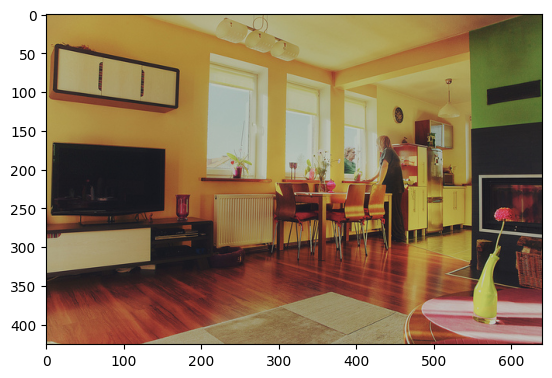

In [2]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
import todd
import torch

def activation(visual: todd.visuals.BaseVisual) -> None:
    activation = torch.rand(h // 16, w // 16)
    visual.image(image)
    visual.activation(activation, width=w, height=h)

def annotations(visual: todd.visuals.BaseVisual) -> None:
    annotations = [
        dict(bbox=[236.98, 142.51, 24.7, 69.5], category_id=64),
        dict(bbox=[7.03, 167.76, 149.32, 94.87], category_id=72),
    ]
    categories = {64: 'potted plant', 72: 'tv'}
    visual.image(image)
    for annotation in annotations:
        category_id = annotation['category_id']
        category_name = categories[category_id]
        visual.annotation(
            category_name,
            *map(int, annotation['bbox']),
            visual.color(category_id),
        )

[2022-11-26 15:49:01,784 20000:4345152896][logging.py:144 todd.base._patches.builtins.get_logger] DEBUG: logger initialized by lutingwang@wangluting.local
[2022-11-26 15:49:01,785 20000:4345152896][builtins.py:8 todd.base._patches.builtins.<module>] INFO: `ipdb` is installed. Using it for debugging.
[2022-11-26 15:49:01,792 20000:4345152896][logging.py:144 todd.base.registries.get_logger] DEBUG: logger initialized by lutingwang@wangluting.local
[2022-11-26 15:49:01,793 20000:4345152896][logging.py:144 todd.base.globals_.get_logger] DEBUG: logger initialized by lutingwang@wangluting.local
[2022-11-26 15:49:01,793 20000:4345152896][globals_.py:125 todd.base.globals_.__set_name__] DEBUG: Device variable CPU is False
[2022-11-26 15:49:01,794 20000:4345152896][globals_.py:125 todd.base.globals_.__set_name__] DEBUG: Device variable CUDA is False
[2022-11-26 15:49:01,794 20000:4345152896][globals_.py:125 todd.base.globals_.__set_name__] DEBUG: Debug variable DRY_RUN is False
[2022-11-26 15:49

In [4]:
visual = todd.visuals.PPTXVisual(w, h)
activation(visual)
visual.save('activation.pptx')

visual = todd.visuals.PPTXVisual(w, h)
annotations(visual)
visual.save('annotations.pptx')

In [5]:
visual = todd.visuals.CV2Visual(w, h)
activation(visual)
visual.save('activation.png')

visual = todd.visuals.CV2Visual(w, h)
annotations(visual)
visual.save('annotations.png')